# Repulsive interaction

We will in this notebook use importance sampling to compute the ground state energies for the repulsive system with an elliptical harmonic oscillator trap.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from vmc.interface import *
from vmc import run_all

from IPython.core.display import display

In [2]:
sns.set(color_codes=True)

In [3]:
mass = 1.0
omega = 1.0

beta = _lambda = np.sqrt(8)
radius = 0.0043

num_particles_list = [10, 50, 100]
num_dimensions = 3

step_length = 0.1

num_samples = int(2**21)
num_thermalization_steps = int(0.1*num_samples)

alpha_min = 0.5*omega - 0.3
alpha_max = 0.5*omega + 0.3
num_alphas = 7

parameter_names = ["alpha"]

alphas = np.linspace(alpha_min, alpha_max, num_alphas).reshape(num_alphas, 1)
bootstrap_samples = 0

In [4]:
def output_table(df, filename):
    columns = list(df)
    columns.remove("variance")
    columns.remove("std")
    columns.remove("block_var")

    df[columns].to_csv(
        filename,
        index=False,
        sep="&",
        header=[
            r"$\alpha$", r"$\langle E_L\rangle$",
            r"$A$", r"$t_C$", r"$\sigma_b$"],
        float_format="%.5f",
        line_terminator="\\\\ \n",
        quotechar=" "
    )

100%|██████████| 7/7 [01:45<00:00, 15.01s/it]


,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.2,35.175477,2.593620e-05,0.005093,0.989947,24.488676,2.914525e-03,0.053986
1,0.3,27.620042,6.819199e-06,0.002611,0.981873,13.651320,5.339390e-04,0.023107
2,0.4,24.978502,1.190970e-06,0.001091,0.972482,13.546657,6.832129e-05,0.008266
3,0.5,24.398775,1.355080e-09,0.000037,0.961404,13.383878,9.129539e-08,0.000302
4,0.6,24.838625,8.360469e-07,0.000914,0.949979,13.315701,3.647936e-05,0.006040
5,0.7,25.828550,2.921419e-06,0.001709,0.937663,13.205791,1.121209e-04,0.010589
6,0.8,27.228952,5.827069e-06,0.002414,0.923749,13.119334,2.061537e-04,0.014358


100%|██████████| 7/7 [22:39<00:00, 194.24s/it]


,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.2,181.693706,1.336919e-04,0.011563,0.987557,199.953656,0.065195,0.255334
1,0.3,142.615905,3.404400e-05,0.005835,0.978489,195.809276,0.011624,0.107817
2,0.4,129.886150,5.966493e-06,0.002443,0.968624,190.445533,0.001641,0.040511
3,0.5,127.299262,9.767403e-08,0.000313,0.957493,195.103685,0.000035,0.005955
4,0.6,129.976305,4.951987e-06,0.002225,0.945954,193.227550,0.001089,0.032999
5,0.7,135.673824,1.625028e-05,0.004031,0.933300,191.963906,0.003347,0.057850
6,0.8,143.232385,3.201821e-05,0.005658,0.920613,192.723987,0.005308,0.072858


100%|██████████| 7/7 [1:23:36<00:00, 716.69s/it]


,alpha,energy,variance,std,acceptance,sampling_time,block_var,block_std
0,0.2,375.044015,2.772035e-04,0.016649,0.985271,745.214380,0.264964,0.514747
1,0.3,296.768792,6.898518e-05,0.008306,0.975337,741.044250,0.040859,0.202137
2,0.4,270.608298,1.317252e-05,0.003629,0.945224,723.068232,0.006582,0.081128
3,0.5,266.372628,5.206086e-07,0.000722,0.953140,702.710003,0.000408,0.020205
4,0.6,272.511713,1.157118e-05,0.003402,0.941116,689.128621,0.005425,0.073655
5,0.7,285.102850,3.475097e-05,0.005895,0.928945,707.482478,0.012953,0.113811
6,0.8,301.406090,7.014896e-05,0.008375,0.916478,707.861177,0.023895,0.154580


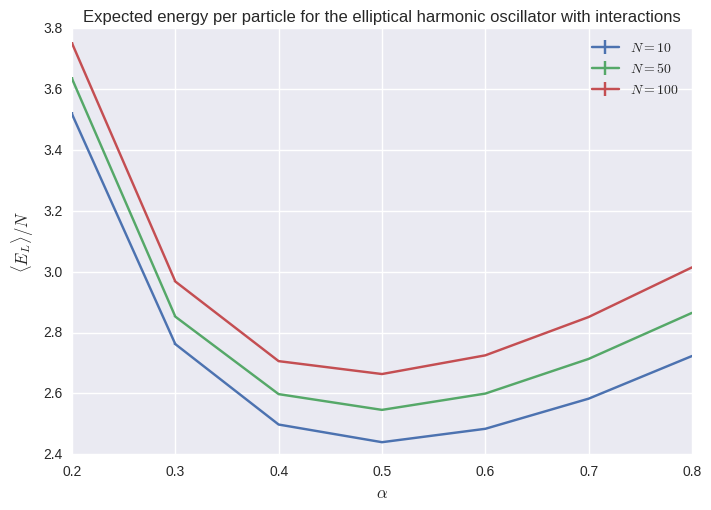

In [5]:
for num_particles in num_particles_list:
    kwargs = {
        "num_samples": num_samples, "num_thermalization_steps": num_thermalization_steps,
        "step_length": step_length
    }

    wavefunction = PyInteractingEllipticalGaussian(
        num_particles, num_dimensions, mass, omega, beta, radius, spread=np.sqrt(step_length)
    )

    sampler_int = PySampler(
        wavefunction, PyEllipticalHarmonicOscillator(_lambda), PyImportanceMetropolis()
    )

    df_int = run_all(
        sampler_int, alphas, parameter_names, bootstrap_samples, **kwargs
    )

    display(df_int)

    output_table(df_int, "../data/tables/3D{0}N_interaction.dat".format(num_particles))

    plt.errorbar(
        df_int["alpha"], df_int["energy"]/num_particles,
        yerr=df_int["block_std"]/num_particles, label=r"$N = %d$" % num_particles
    )

plt.xlabel(r"$\alpha$", fontsize=12)
plt.ylabel(r"$\langle E_L\rangle/N$", fontsize=12)
plt.title(r"Expected energy per particle for the elliptical harmonic oscillator with interactions")
plt.legend(loc="best")
plt.savefig("../data/figures/problem_e.pdf")
plt.show()